In [5]:
import numpy as np
import matplotlib.pyplot as plt

from data.load_mnist import load_mnist
from core.network.twolayernet import BackPropagationNet
from core.layers import *

In [6]:
(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = X_train.shape[0]

## Activation Function variations

### Swish

In [3]:
swish_network = BackPropagationNet(784, 50, 10, activation_layer=Swish)

swish_iters_num = 10000
swish_batch_size = 100
swish_lr = 0.1

swish_train_loss_list = []
swish_train_acc_list = []
swish_test_acc_list = []

swish_iter_per_epoch = max(train_size / swish_batch_size, 1)

for i in range(swish_iters_num):
    batch_mask = np.random.choice(train_size, swish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = swish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        swish_network.params[key] -= swish_lr * grad[key]

    loss = swish_network.loss(X_batch, T_batch)
    swish_train_loss_list.append(loss)

    if i % swish_iter_per_epoch == 0:
        swish_train_acc = swish_network.accuracy(X_train, T_train)
        swish_test_acc = swish_network.accuracy(X_test, T_test)
        swish_train_acc_list.append(swish_train_acc)
        swish_test_acc_list.append(swish_test_acc)

        print("train acc, test acc | " + str(swish_train_acc) + ", " + str(swish_test_acc))

train acc, test acc | 0.1854, 0.1784
train acc, test acc | 0.8851666666666667, 0.8917
train acc, test acc | 0.9092833333333333, 0.9093
train acc, test acc | 0.9198166666666666, 0.9205
train acc, test acc | 0.9351833333333334, 0.9332
train acc, test acc | 0.9461, 0.9418
train acc, test acc | 0.9467166666666667, 0.9423
train acc, test acc | 0.94805, 0.9419
train acc, test acc | 0.95545, 0.9467
train acc, test acc | 0.9566, 0.9503
train acc, test acc | 0.9607, 0.9516
train acc, test acc | 0.9620333333333333, 0.9519
train acc, test acc | 0.9640833333333333, 0.9552
train acc, test acc | 0.966, 0.9543
train acc, test acc | 0.9678, 0.9565
train acc, test acc | 0.96965, 0.9575
train acc, test acc | 0.9708666666666667, 0.957


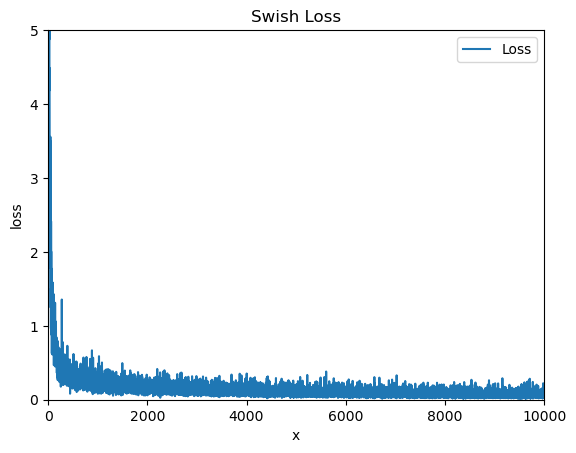

In [4]:
x = np.arange(len(swish_train_loss_list))
plt.plot(x, swish_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("Swish Loss")
plt.show()

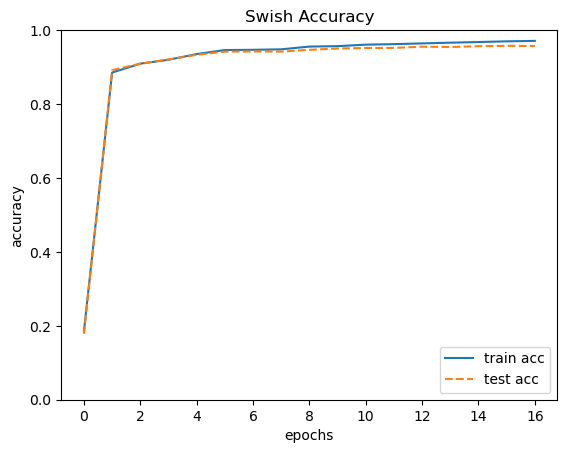

In [5]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(swish_train_acc_list))

plt.plot(x, swish_train_acc_list, label="train acc")
plt.plot(x, swish_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("Swish Accuracy")
plt.show()

In [6]:
print(f"final loss: {swish_train_loss_list[-1]}")
print(f"final train accuracy: {swish_train_acc_list[-1]}")
print(f"final test accuracy: {swish_test_acc_list[-1]}")

final loss: 0.07040239859251772
final train accuracy: 0.9708666666666667
final test accuracy: 0.957


### Mish

In [7]:
mish_network = BackPropagationNet(784, 50, 10, activation_layer=Mish)

mish_iters_num = 10000
mish_batch_size = 100
mish_lr = 0.1

mish_train_loss_list = []
mish_train_acc_list = []
mish_test_acc_list = []

mish_iter_per_epoch = max(train_size / mish_batch_size, 1)

for i in range(mish_iters_num):
    batch_mask = np.random.choice(train_size, mish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = mish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        mish_network.params[key] -= mish_lr * grad[key]

    loss = mish_network.loss(X_batch, T_batch)
    mish_train_loss_list.append(loss)

    if i % mish_iter_per_epoch == 0:
        mish_train_acc = mish_network.accuracy(X_train, T_train)
        mish_test_acc = mish_network.accuracy(X_test, T_test)
        mish_train_acc_list.append(mish_train_acc)
        mish_test_acc_list.append(mish_test_acc)

        print("train acc, test acc | " + str(mish_train_acc) + ", " + str(mish_test_acc))

train acc, test acc | 0.12688333333333332, 0.1305
train acc, test acc | 0.8761833333333333, 0.8793
train acc, test acc | 0.9222333333333333, 0.9247
train acc, test acc | 0.9353666666666667, 0.9342
train acc, test acc | 0.9394166666666667, 0.9365
train acc, test acc | 0.9486666666666667, 0.9446
train acc, test acc | 0.95385, 0.9485
train acc, test acc | 0.9583333333333334, 0.9504
train acc, test acc | 0.9603, 0.953
train acc, test acc | 0.9636666666666667, 0.9564
train acc, test acc | 0.96485, 0.9584
train acc, test acc | 0.9679333333333333, 0.9604
train acc, test acc | 0.9681666666666666, 0.9616
train acc, test acc | 0.9709166666666667, 0.9644
train acc, test acc | 0.9719333333333333, 0.9647
train acc, test acc | 0.9724833333333334, 0.9641
train acc, test acc | 0.97385, 0.9632


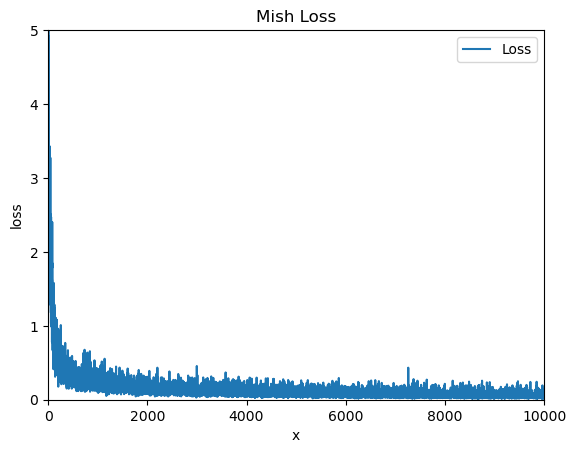

In [8]:
x = np.arange(len(mish_train_loss_list))
plt.plot(x, mish_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("Mish Loss")
plt.show()

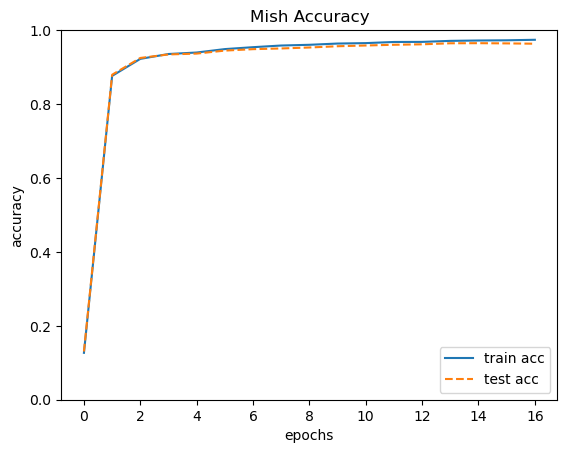

In [9]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(mish_train_acc_list))

plt.plot(x, mish_train_acc_list, label="train acc")
plt.plot(x, mish_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("Mish Accuracy")
plt.show()

In [10]:
print(f"final loss: {mish_train_loss_list[-1]}")
print(f"final train accuracy: {mish_train_acc_list[-1]}")
print(f"final test accuracy: {mish_test_acc_list[-1]}")

final loss: 0.02336039504386583
final train accuracy: 0.97385
final test accuracy: 0.9632


## Network Structure Variation

### Three Layer Network with Mish activation function

In [7]:
gelu_network = BackPropagationNet(784, 100, 50, 10, activation_layer=Swish)

gelu_iters_num = 10000
gelu_batch_size = 100
gelu_lr = 0.1

gelu_train_loss_list = []
gelu_train_acc_list = []
gelu_test_acc_list = []

gelu_iter_per_epoch = max(train_size / gelu_batch_size, 1)

for i in range(gelu_iters_num):
    batch_mask = np.random.choice(train_size, gelu_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = gelu_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        gelu_network.params[key] -= gelu_lr * grad[key]

    loss = gelu_network.loss(X_batch, T_batch)
    gelu_train_loss_list.append(loss)

    if i % gelu_iter_per_epoch == 0:
        gelu_train_acc = gelu_network.accuracy(X_train, T_train)
        gelu_test_acc = gelu_network.accuracy(X_test, T_test)
        gelu_train_acc_list.append(gelu_train_acc)
        gelu_test_acc_list.append(gelu_test_acc)

        print("train acc, test acc | " + str(gelu_train_acc) + ", " + str(gelu_test_acc))

train acc, test acc | 0.10066666666666667, 0.0999
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098


KeyboardInterrupt: 

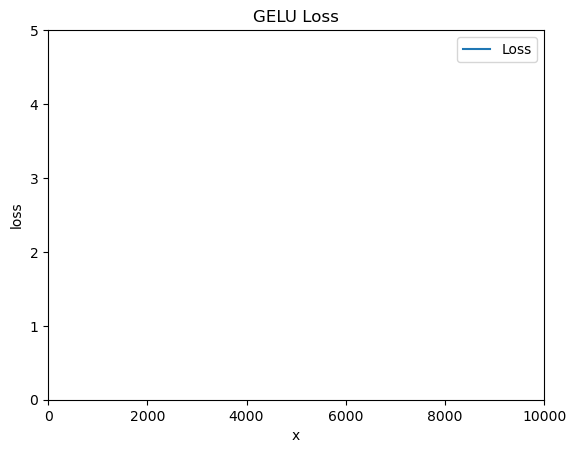

In [8]:
x = np.arange(len(gelu_train_loss_list))
plt.plot(x, gelu_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("GELU Loss")
plt.show()

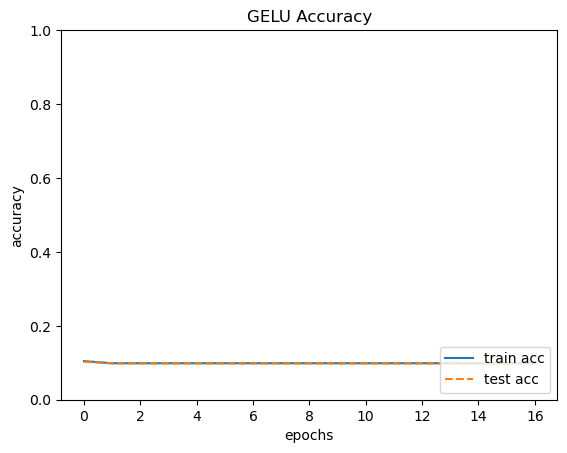

In [9]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(gelu_train_acc_list))

plt.plot(x, gelu_train_acc_list, label="train acc")
plt.plot(x, gelu_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("GELU Accuracy")
plt.show()

In [10]:
print(f"final loss: {gelu_train_loss_list[-1]}")
print(f"final train accuracy: {gelu_train_acc_list[-1]}")
print(f"final test accuracy: {gelu_test_acc_list[-1]}")

final loss: nan
final train accuracy: 0.09871666666666666
final test accuracy: 0.098
